In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import scipy as sp
from scipy import stats
import pickle

## Utility Functions

In [3]:
def Examine_Nulls(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df

## Load and Process Data

In [4]:
precip_df = pd.read_csv('AHCCD_precip_processed.csv', index_col=['ClimID', 'Date'])
# precip_df.drop('index', axis=1, inplace=True)
precip_df.reset_index(inplace=True)
precip_df.rename(columns={'ClimID' : 'Station'}, inplace=True)
precip_df['Date'] = pd.to_datetime(precip_df['Date'])
precip_df['Station'] = precip_df['Station'].astype(str) ## VERY IMPORTANT

C:\Users\quintoj\Anaconda3\envs\Default\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
temp_df = pd.read_csv('AHCCD_full.csv')

In [6]:
temp_df['Date'] = pd.to_datetime(temp_df['Date'])

In [7]:
np.unique(temp_df['Station']).shape

(323,)

In [8]:
np.unique(precip_df['Station']).shape

(323,)

In [9]:
merged_df_ = pd.merge(precip_df, temp_df, on=['Station', 'Date'])

In [10]:
np.unique(merged_df_['Station']).shape

(323,)

In [61]:
merged_df_.loc[(merged_df_['snow_frac'] <= 0.05) & (merged_df_['Mean_Temp'] <= -20)]

cR(mm)  cS(mm)  QCdP=cR+cS(mm)  snow_frac  Mean_Temp  \
Station Date                                                               
1124112 1943-01-20   1.258     0.0           1.258        0.0      -20.6   
1168520 1924-12-15  11.550     0.0          11.550        0.0      -21.2   
2100630 1979-12-10   1.240     0.0           1.240        0.0      -27.0   
2201700 1914-03-16   1.258     0.0           1.258        0.0      -29.2   
3010890 2005-01-16   2.173     0.0           2.173        0.0      -22.3   
3053600 1974-01-11   5.502     0.0           5.502        0.0      -22.8   
4013480 1937-12-10   1.570     0.0           1.570        0.0      -22.0   
4020160 1949-12-20   2.820     0.0           2.820        0.0      -21.7   
        1949-12-22   2.820     0.0           2.820        0.0      -20.0   
        1949-12-29   2.820     0.0           2.820        0.0      -24.4   
        1949-12-30   2.820     0.0           2.820        0.0      -22.0   
4021520 1923-02-02   8.122     0.0           8.122        0.0      -30.0   
6060773 1947-01-13   1.260     0.0           1.260        0.0      -20.3   
6068980 1984-01-21   2.173     0.0           2.173        0.0      -24.0   
6081928 1943-12-16   1.050     0.0           1.050        0.0      -35.0   
6105460 1984-01-08   1.150     0.0           1.150        0.0      -20.3   
7014290 1934-01-29  17.380     0.0          17.380        0.0      -26.6   
7020840 1946-12-16   1.260     0.0           1.260        0.0      -20.3   
        1951-02-08  13.430     0.0          13.430        0.0      -23.4   
7027840 1953-01-17   7.602     0.0           7.602        0.0      -21.2   
7035520 1971-02-04   2.280     0.0           2.280        0.0      -23.5   
7036855 1973-12-25  12.054     0.0          12.054        0.0      -24.7   
7038975 1975-02-04   2.798     0.0           2.798        0.0      -24.5   
7043960 1918-02-21  12.070     0.0          12.070        0.0      -25.9   
8102300 1979-01-20  22.573     0.0          22.573        0.0      -25.0   
8103500 1986-01-25   1.150     0.0           1.150        0.0      -20.8   
8401550 1965-02-07   1.240     0.0           1.240        0.0      -20.0   
8502400 1953-01-31   1.258     0.0           1.258        0.0      -21.1   

                    Max_Temp  Min_Temp  
Station Date                            
1124112 1943-01-20     -17.8     -23.3  
1168520 1924-12-15     -20.6     -21.7  
2100630 1979-12-10     -16.0     -38.0  
2201700 1914-03-16     -23.9     -34.4  
3010890 2005-01-16     -17.0     -27.5  
3053600 1974-01-11     -14.4     -31.1  
4013480 1937-12-10     -12.6     -31.4  
4020160 1949-12-20     -21.7     -21.7  
        1949-12-22      -7.2     -32.8  
        1949-12-29     -19.4     -29.4  
        1949-12-30     -17.8     -26.1  
4021520 1923-02-02     -23.9     -36.1  
6060773 1947-01-13      -8.9     -31.7  
6068980 1984-01-21     -12.0     -36.0  
6081928 1943-12-16     -35.1     -34.8  
6105460 1984-01-08     -14.0     -26.5  
7014290 1934-01-29     -23.3     -29.9  
7020840 1946-12-16     -14.3     -26.2  
        1951-02-08     -22.1     -24.7  
7027840 1953-01-17      -3.9     -38.4  
7035520 1971-02-04      -9.4     -37.6  
7036855 1973-12-25     -15.0     -34.4  
7038975 1975-02-04     -13.9     -35.0  
7043960 1918-02-21     -22.8     -28.9  
8102300 1979-01-20     -13.0     -37.0  
8103500 1986-01-25     -11.0     -30.5  
8401550 1965-02-07      -6.7     -33.3  
8502400 1953-01-31     -17.2     -25.0

In [12]:
# merged_df = merged_df[merged_df['Date'].dt.year >= 2000]

In [13]:
merged_df_.set_index(['Station', 'Date'], inplace=True)

In [14]:
Examine_Nulls(merged_df_)

column_name  percent_missing
cR(mm)                  cR(mm)              0.0
cS(mm)                  cS(mm)              0.0
QCdP=cR+cS(mm)  QCdP=cR+cS(mm)              0.0
snow_frac            snow_frac              0.0
Mean_Temp            Mean_Temp              0.0
Max_Temp              Max_Temp              0.0
Min_Temp              Min_Temp              0.0

In [15]:
merged_df_.describe()

cR(mm)        cS(mm)  QCdP=cR+cS(mm)     snow_frac     Mean_Temp  \
count  1.771383e+06  1.771383e+06    1.771383e+06  1.771383e+06  1.771383e+06   
mean   6.536110e+00  1.715113e+00    8.251222e+00  2.758313e-01  5.282186e+00   
std    9.763618e+00  4.300939e+00    9.716322e+00  4.375206e-01  1.056244e+01   
min    0.000000e+00  0.000000e+00    1.000000e+00  0.000000e+00 -4.980000e+01   
25%    1.500000e-01  0.000000e+00    2.336000e+00  0.000000e+00 -9.000000e-01   
50%    3.091000e+00  0.000000e+00    4.927000e+00  0.000000e+00  6.400000e+00   
75%    8.434000e+00  1.500000e+00    1.033300e+01  9.934876e-01  1.320000e+01   
max    3.255130e+02  9.594240e+02    9.681250e+02  1.000000e+00  3.230000e+01   

           Max_Temp      Min_Temp  
count  1.771383e+06  1.771383e+06  
mean   9.597488e+00  9.455119e-01  
std    1.089673e+01  1.079461e+01  
min   -4.560000e+01 -5.830000e+01  
25%    2.200000e+00 -4.400000e+00  
50%    1.000000e+01  2.700000e+00  
75%    1.780000e+01  8.900000e+00  
max    4.750000e+01  2.830000e+01

In [16]:
merged_df_.to_csv("combined_ahccd_1mm.csv")

In [17]:
merged_df = merged_df_[['Mean_Temp', 'snow_frac']]

In [18]:
merged_df

Mean_Temp  snow_frac
Station Date                            
1012010 1913-10-03       11.0    0.00000
        1913-10-04        8.4    0.00000
        1913-10-07        6.3    0.00000
        1913-10-09        5.8    0.00000
        1913-10-10        6.7    0.00000
...                       ...        ...
709CEE9 2015-11-06        7.3    0.00000
        2015-11-19        8.8    0.18132
        2015-11-21       -4.0    1.00000
        2015-11-24      -12.0    1.00000
        2015-11-28      -12.8    1.00000

[1771383 rows x 2 columns]

## Univariate Modelling

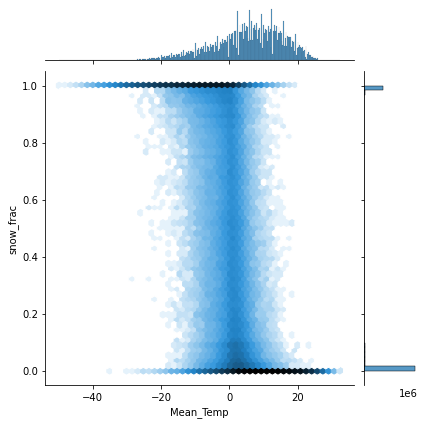

In [20]:
sns.jointplot(data=merged_df, x='Mean_Temp', y='snow_frac', kind='hex', bins='log')

<AxesSubplot:>

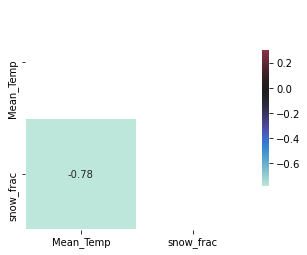

In [21]:
corr_matrix = merged_df.corr() 

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## Logistic Curve Fitting

In [22]:
from scipy.optimize import curve_fit 

In [23]:
def logistic4(x, k, mu):
    a = 1 
    c = 0
    return a + (c-a)/(1+np.exp(-k*(x-mu))) 

In [24]:
def myfit(func, x, y):
    xr = x.ravel()
    yr = y.ravel()
    asort = np.argsort(xr)
    popt, pcov = curve_fit(func, xr[asort], yr[asort])
    res = yr[asort]-func(xr[asort], *popt)
    return popt, res # gives error b/w every pred and true point -> useful for validation -> MSE

In [25]:
def RMSE(calculate_error, yData, resid=None, yPred=None, params=None):
    if calculate_error is False and resid is not None:
        SE = np.square(resid) # squared errors
        MSE = np.mean(SE) # mean squared errors
        RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
        Rsquared = 1.0 - (np.var(resid) / np.var(yData))
    elif calculate_error is True and yPred is not None:
        resid = yData - yPred
        SE = np.square(resid) # squared errors
        MSE = np.mean(SE) # mean squared errors
        RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
        Rsquared = 1.0 - (np.var(resid) / np.var(yData))
    if params is not None:
        print('Parameters:', params)
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

In [30]:
x = merged_df['Mean_Temp']
y = merged_df['snow_frac']
x_lr = np.linspace(merged_df['Mean_Temp'].min(), merged_df['Mean_Temp'].max(), 1000)

In [31]:
params_log, resid_log = myfit(logistic4, x, y)

In [32]:
# For AHCCD
RMSE(params=params_log, calculate_error=False, yData=y, resid=resid_log) 

Parameters: [ 0.58729268 -0.06493154]
RMSE: 0.20242493693474778
R-squared: 0.7862400218365349


In [60]:
params_era5 = [1.36527176, 0.98420547]
y_log_era5 = logistic4(x, *params_era5)

In [62]:
# For ERA5-Land
RMSE(params=params_era5, calculate_error=True, yData=y, yPred=y_log_era5) 

Parameters: [1.36527176, 0.98420547]
RMSE: 0.21720632123018443
R-squared: 0.7575573610496775


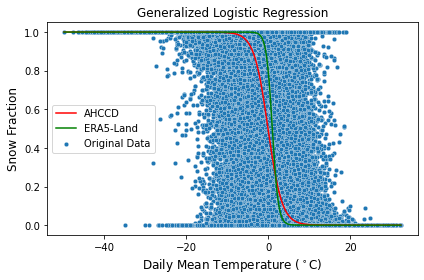

In [64]:
plt.scatter(x, y, marker='o', edgecolor='white', linewidth=0.3, label='Original Data', s=20)
plt.plot(x_lr, logistic4(x_lr, *params_log), color='red', label= 'AHCCD')
plt.plot(x_lr, logistic4(x_lr, *params_era5), color='green', label= 'ERA5-Land')
plt.xlabel('Daily Mean Temperature ($^\circ$C)')
plt.ylabel('Snow Fraction')
plt.title("Generalized Logistic Regression")
plt.legend(loc='center left')
plt.tight_layout()

## Isotonic Regression

In [34]:
from sklearn.isotonic import IsotonicRegression 

In [35]:
## For AHCCD
ir = IsotonicRegression(increasing=False).fit(x, y)
# Actual predictions
y_ir = ir.predict(x)
# For graphing
yy_ir = ir.predict(x_lr)

In [55]:
## For ERA5-Land
ir_era5 = Load_Var('iso_t2m.data')
y_ir_era5 = ir_era5.predict(x)
yy_ir_era5 = ir_era5.predict(x_lr)

Text(0.5, 1.0, 'Isotonic Regression')

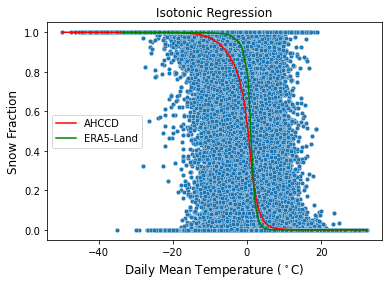

In [59]:
plt.scatter(x, y,  marker='o', edgecolor='white', linewidth=0.3, s=20)
plt.plot(x_lr, yy_ir, color='red', label='AHCCD')
plt.plot(x_lr, yy_ir_era5, color='green', label='ERA5-Land')
plt.xlabel('Daily Mean Temperature ($^\circ$C)')
plt.ylabel('Snow Fraction')
plt.legend()
plt.title('Isotonic Regression')

In [37]:
# For AHCCD
RMSE(calculate_error=True, yData=y, yPred=y_ir) 

RMSE: 0.20116272121522344
R-squared: 0.7886032872024724


In [57]:
# For ERA5-Land
RMSE(calculate_error=True, yData=y, yPred=y_ir_era5) 

RMSE: 0.21488610065637986
R-squared: 0.761807781859317


## Heaviside Function

In [38]:
# Make a dataframe of mean temp values and predicted values from isotonoic regression
iso_pts = pd.DataFrame(
    {"Mean_Temp": merged_df['Mean_Temp'],
     "snow_frac": y_ir}
)
iso_pts.reset_index(inplace=True)
iso_pts.drop(['Date', 'Station'], axis=1, inplace=True)

In [39]:
# Function to determine the mean temperature at which isotonic regression gives a value of 0.5
def find_neighbours(value, df, var):
    exactmatch=df[df.snow_frac==value]
    if exactmatch.empty is False:
        return exactmatch.index
    else:
        lowerneighbour_ind = df[df.snow_frac<value].snow_frac.idxmax()
        upperneighbour_ind = df[df.snow_frac>value].snow_frac.idxmin()
        
        lower_diff = np.abs(df.iloc[lowerneighbour_ind, :].snow_frac - 0.5)
        upper_diff = np.abs(df.iloc[upperneighbour_ind, :].snow_frac - 0.5)

        if lower_diff > upper_diff:
            return df.iloc[upperneighbour_ind, :][var]
        else:
            return df.iloc[lowerneighbour_ind, :][var]

In [40]:
thresh = find_neighbours(0.5, iso_pts, 'Mean_Temp')
print("Daily Mean Temp Threshold:", thresh) 

Daily Mean Temp Threshold: 0.3


In [41]:
def Heaviside(x, a ,b, c): 
    return a * (np.sign(x - b) + c) # Heaviside function

In [42]:
# For AHCCD
y_heaviside = Heaviside(x, -0.5, thresh, -1)
RMSE(calculate_error=True, yData=y, yPred=y_heaviside) 

RMSE: 0.23716958905817787
R-squared: 0.7062387350818087


In [51]:
# For ERA5-Land Data
t2m_thresh = 1.0116516113281477
y_heaviside_ = Heaviside(x, -0.5, t2m_thresh, -1)
RMSE(calculate_error=True, yData=y, yPred=y_heaviside_) 

RMSE: 0.24775886304152311
R-squared: 0.6832913943665115


Text(0.5, 1.0, 'Heaviside Function')

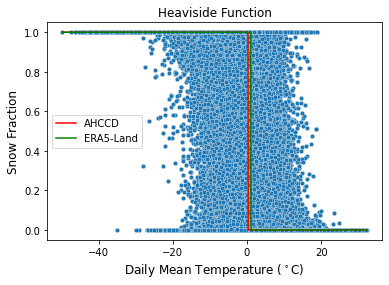

In [56]:
plt.scatter(x, y,  marker='o', edgecolor='white', linewidth=0.3, s=20)
plt.plot(x_lr, Heaviside(x_lr, -0.5, thresh, -1), c='r', label='AHCCD')
# Now plot heaviside fcn from ERA5-Land data
plt.plot(x_lr, Heaviside(x_lr, -0.5, t2m_thresh, -1), c='g', label="ERA5-Land")
plt.xlabel('Daily Mean Temperature ($^\circ$C)')
plt.ylabel('Snow Fraction')
plt.legend()
plt.title('Heaviside Function')

In [44]:
def Binned_Stats(df, variable, lower_temp, upper_temp, test_stat='mean', 
                 plot_histogram=False, interval=0.1, plot_bins=False):  
    # Define temperature bins
    values = np.arange(lower_temp, upper_temp, interval)
    values = [round(i, 1) for i in values]
    
    # Calculate bin statistics
    bin_stats, bin_edges, binnumber = stats.binned_statistic(
        df[variable], 
        df['snow_frac'], 
        statistic='mean', 
        bins=values
    )
    if plot_bins is True:
        plt.figure()
        plt.plot(df[variable], df['snow_frac'], 'c.', label='raw data', alpha=0.005)
        plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='red', lw=5,
                   label='binned statistic of data')
        plt.legend(loc='lower left')
        plt.xlabel(variable)
        plt.ylabel('Snow Fraction')
    
    # Separate snow fraction into temperature-based bins
    bins = [df['snow_frac'][binnumber==i] for i in range(len(values))]
    
    # Concatenate all bins into a single dataframe, with the temperature bin as a multi-index
    bin_df = pd.concat(bins, keys=values, names=[variable])
    return bin_edges, pd.DataFrame(bin_df)

In [45]:
def Binned_Quantiles(df, variable, quantiles, bins):
    quantiles = [df.iloc[df.index.get_level_values(variable) == i].quantile(qts, axis=0) for i in bins]
    quantile_df = pd.concat(quantiles, keys=bins, names=[variable])
    return pd.DataFrame(quantile_df)

In [46]:
bin_edges, bin_df = Binned_Stats(merged_df,'Mean_Temp', -20, 20)
qts = [0.25, 0.5, 0.75]
quantile_df = Binned_Quantiles(bin_df, 'Mean_Temp', qts, bin_edges)

In [47]:
qdf = quantile_df.reset_index()
qdf.rename(columns={'level_1': 'quantile'}, inplace=True)
qdf['snow_frac'] = qdf['snow_frac'].map(lambda x: x*100)

<AxesSubplot:xlabel='Mean_Temp', ylabel='snow_frac'>

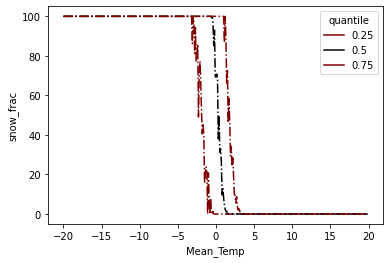

In [48]:
sns.lineplot(data=qdf, x="Mean_Temp", y="snow_frac", hue='quantile', palette=['maroon','black','maroon'], linestyle='dashdot') 

C:\Users\quintoj\Anaconda3\envs\Default\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


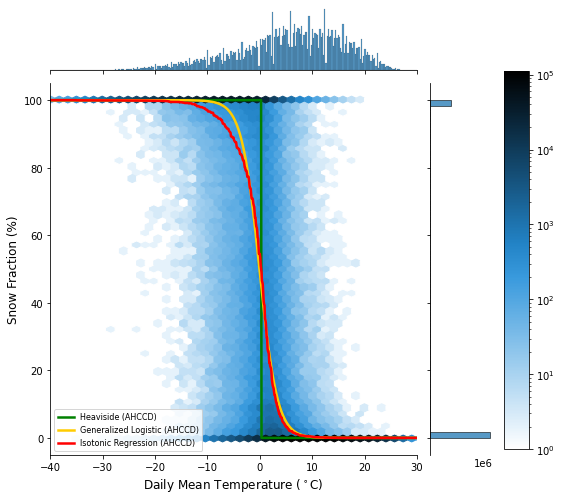

In [76]:
plt.rcParams["axes.labelsize"] = 12
g = sns.jointplot(
    x=merged_df['Mean_Temp'], 
    y=merged_df['snow_frac']*100, 
    kind='hex', 
    bins='log', 
    height=7
)
# sns.lineplot(
#     data=qdf, 
#     x="Mean_Temp", 
#     y="snow_frac", 
#     hue='quantile', 
#     palette=['maroon','black','maroon'], 
#     linestyle='--', 
#     ax=g.ax_joint, 
#     linewidth=2
# )
sns.lineplot(
    x_lr, 
    Heaviside(x_lr, -50, thresh, -1), 
    color='g', 
    linewidth=2.5, 
    label='Heaviside (AHCCD)', 
    ax=g.ax_joint
)
# sns.lineplot(
#     x_lr, 
#     Heaviside(x_lr, -50, t2m_thresh, -1), 
#     color='g', 
#     linewidth=2.5, 
#     label='Heaviside (ERA5-Land)', 
#     ax=g.ax_joint
# )
sns.lineplot(
    x=x_lr, 
    y=(logistic4(x_lr, *params_log))*100, 
    color='#ffcc00', 
    label= 'Generalized Logistic (AHCCD)', 
    ax=g.ax_joint, 
    linewidth=2.5
)
# sns.lineplot(
#     x=x_lr, 
#     y=(logistic4(x_lr, *params_era5))*100, 
#     color='#ffcc00', 
#     label= 'Generalized Logistic (ERA5-Land)', 
#     ax=g.ax_joint, 
#     linewidth=2.5
# )
sns.lineplot(
    x=x_lr, 
    y=[i*100 for i in yy_ir], 
    color='red', 
    label= 'Isotonic Regression (AHCCD)', 
    ax=g.ax_joint, 
    linewidth=2.5
)
# sns.lineplot(
#     x=x_lr, 
#     y=[i*100 for i in yy_ir_era5], 
#     color='red', 
#     label= 'Isotonic Regression (ERA5-Land)', 
#     ax=g.ax_joint, 
#     linewidth=2.5
# )
g.ax_joint.legend(prop={"size": 8}, loc='lower left')
g.ax_joint.set(xlabel='Daily Mean Temperature ($^\circ$C)', ylabel='Snow Fraction (%)', xlim=(-40, 30))
cbar_ax = g.fig.add_axes([1, .1, .05, .75])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.savefig('Mean_Temp_final.png')